In [ ]:
from db_conn import query_from_db as sql_query
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = sql_query("""
SELECT ch.HQCountry, COUNT(*) AS TotalCompanies
FROM pitchbook_db.Company c
JOIN pitchbook_db.CompanyIndustryInfo cii ON c.CompanyID = cii.CompanyID
JOIN pitchbook_db.CompanyHQinfo ch ON c.CompanyID = ch.CompanyID
JOIN pitchbook_db.CompanyFinancialInfo cfi ON c.CompanyID = cfi.CompanyID
WHERE c.YearFounded >= 2020
  AND ch.HQCountry IN ('Norway', 'Estonia', 'Netherlands', 'Germany', 'United Kingdom', 'United States', 'Spain')
  AND cii.PrimaryIndustrySector = 'Information Technology'
  AND c.TotalRaised IS NOT NULL
GROUP BY 1
ORDER BY 2
 """)

In [ ]:
print(df)

        HQCountry  TotalCompanies
0          Norway              53
1         Estonia             104
2     Netherlands             134
3           Spain             206
4         Germany             427
5  United Kingdom            1005
6   United States            5444


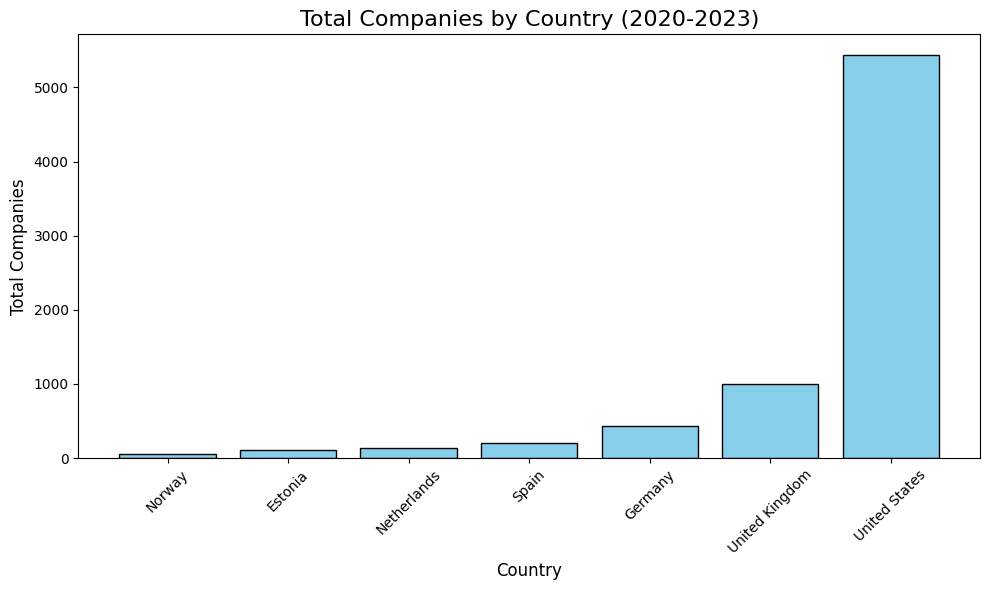

In [14]:
plt.figure(figsize=(10, 6)) 
plt.bar(df['HQCountry'], df['TotalCompanies'], color='skyblue', edgecolor='black')

plt.title('Total Companies by Country (2020-2023)', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Companies', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

plt.show()